# Support Vector Machine (SVM)

Invented in [1963](https://en.wikipedia.org/wiki/Support_vector_machine#History) by [Vladimir N. Vapnik](https://en.wikipedia.org/wiki/Vladimir_Vapnik) and Alexey Ya. Chervonenkis while working at AT&T Bell Labs. Vladimir N. Vapnik joined Facebook AI Research in Nov 2014.

In 1992, Bernhard E. Boser, Isabelle M. Guyon and Vladimir N. Vapnik suggested a way to create nonlinear classifiers by applying the kernel trick to maximum-margin hyperplanes.

The current standard incarnation (soft margin) was proposed by Corinna Cortes and Vapnik in 1993 and published in 1995.



References:

1. [Support Vector Machine in Javascript Demo by Karpathy](http://cs.stanford.edu/people/karpathy/svmjs/demo/)

2. [SVM](http://www.svms.org/tutorials/)

3. [Statsoft](http://www.statsoft.com/Textbook/Support-Vector-Machines)

4. [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine)

5. [Scikit-Learn](http://scikit-learn.org/stable/modules/svm.html)


### Learning Outcomes:

* Introduction
* Linear SVM Classification
* Polynomial Kernal
* Radial Basis Function /  Gaussian Kernel
* Support Vector Regression

***

# 1. Introduction

Supervised learning methods used for classification, regression and outliers detection.

Let's assume we have two classes here - black and purple. In classification, we are interested in the best way to separate the two classes. 

<img src="img\SVM 1.png" height=50% width=50%>

We can separate them with a line such as the example below. You can consider this as an example of how logistic regression would segregate the two classes.

<img src="img\SVM 2.png" height=50% width=50%>

However, there are infinite lines (in 2-dimensional space) or hyperplanes (in 3-dimensional space) that can be used to separate the two classes as the example below illustrates. 

The term hyperplane essentially means it is a subspace of one dimension less than its ambient space. If a space is 3-dimensional then its hyperplanes are the 2-dimensional planes, while if the space is 2-dimensional, its hyperplanes are the 1-dimensional lines. ~ [Wikipedia](https://en.wikipedia.org/wiki/Hyperplane)

<img src="img\SVM 3.png" height=50% width=50%>

In SVM, the **separating line**, the solid brown line, is the line that allows for largest margin between the two classes. 

SVM would place the separating line in the middle of the margin, also called maximum margin. SVM will optimise and locate the hyperplane that maximises the margin of the two classes.

The samples that are closest to the hyperplane are called **support vectors**, circled in red. 

<img src="img\SVM 4.png" height=50% width=50%>

***
# 2. Linear SVM Classification


* Support Vectors

* Separate with a straight line (linearly separable)

* Margin

  * Hard margin classification
      * Strictly based on those that are at the margin between the two classes
      * However, this is sensitive to outliers
      
  * Soft margin classification
      * Widen the margin and allows for violation
      * With Python Scikit-Learn, you control the width of the margin
      * Control with `C` hyperparameter
        * smaller `C` leads to a wider street but more margin violations
        * High `C` - fewer margin violations but ends up with a smaller margin



**Note:**

* SVM are sensitive to feature scaling


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
col = ['petal_length', 'petal_width', 'species']
df.loc[:, col].head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [4]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col]

In [6]:
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['species_num'] = df['species'].map(species_to_num)
y = df['species_num']

Documentations on each:

* [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

  Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.
  
  
  
* [SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

  C-Support Vector Classification.
  
  The implementation is based on libsvm. The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to dataset with more than a couple of 10000 samples.

In [7]:
C = 0.1
clf = svm.SVC(kernel='linear', C=C)
#clf = svm.LinearSVC(C=C, loss='hinge')
#clf = svm.SVC(kernel='poly', degree=3, C=C)
#clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
clf.fit(X, y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [8]:
clf.predict([[6, 2]])

array([2])

In [9]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

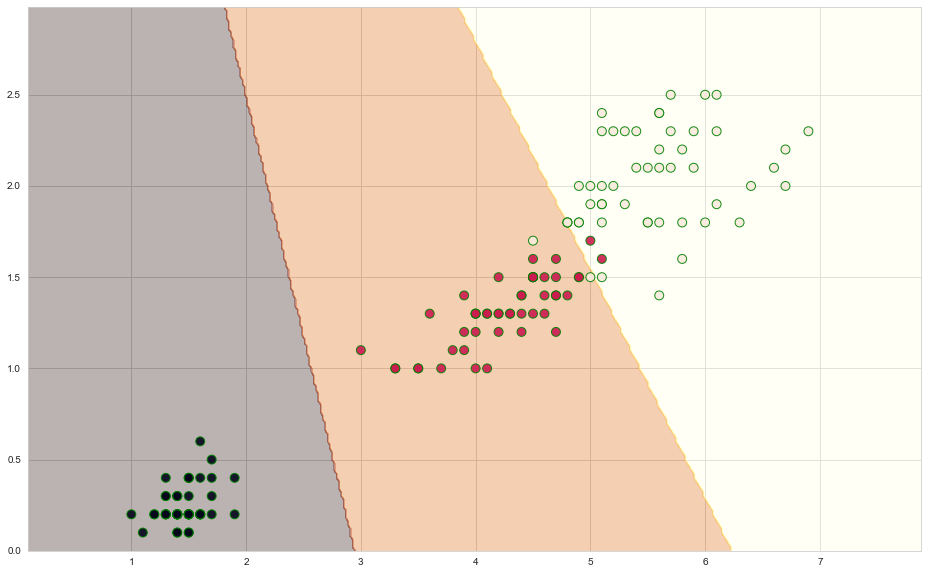

In [10]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g');

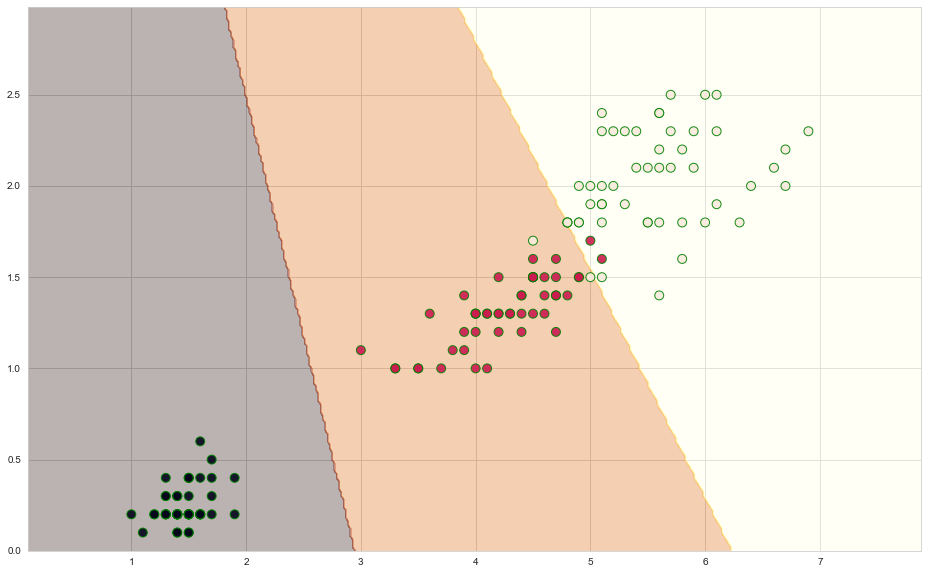

In [11]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g');

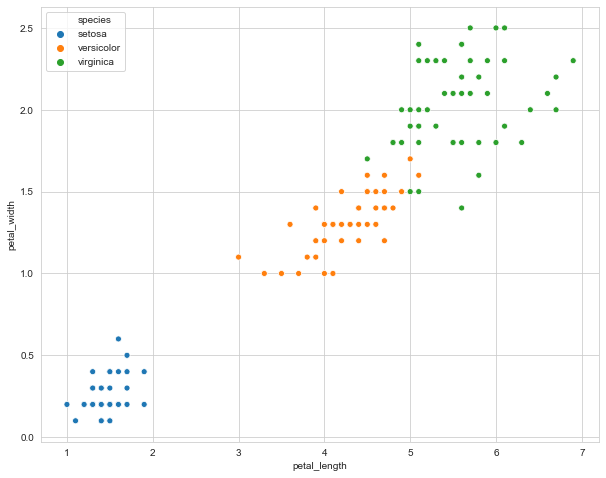

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='petal_length', y='petal_width', data=df, hue='species')

## Linear SVM Implementation

In [13]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8, 
                                                    random_state=0)

#### Scale Features

In [14]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [15]:
C = 1.0
clf = svm.SVC(kernel='linear', C=C)
clf.fit(X_std_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

#### Cross Validation within Train Dataset

In [17]:
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print(f"Average Accuracy: \t {np.mean(res):.4}")
print(f"Accuracy SD: \t\t {np.std(res):.4}")

Average Accuracy: 	 0.9501
Accuracy SD: 		 0.05377


In [18]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [19]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 34,  3],
       [ 0,  3, 41]])

In [20]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.92      0.92      0.92        37
           2       0.93      0.93      0.93        44

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



#### Test Dataset

In [21]:
y_test_pred = clf.predict(sc_x.transform(X_test))

In [22]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]])

In [23]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.92      0.92      0.92        37
           2       0.93      0.93      0.93        44

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



***
# 3. Polynomial Kernel

<img src='img\polynomial.png'>

In [25]:
C = 1.0
clf = svm.SVC(kernel='poly', degree=3, C=C)
clf.fit(X, y)

/Users/pramote/py374-venv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [26]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

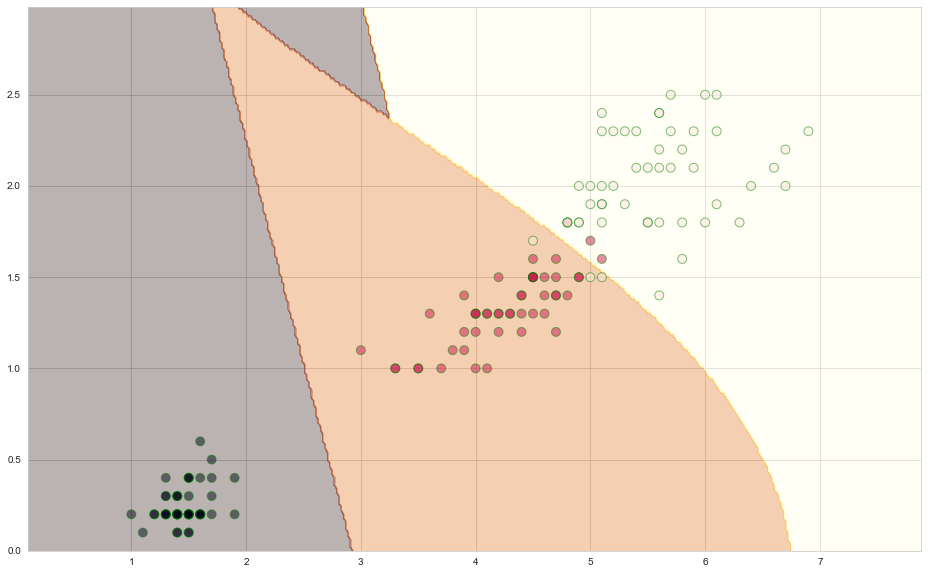

In [27]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.5, edgecolors='g');

## Polynomial SVM Implementation

In [28]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_std_test, y_train, y_test = train_test_split(X, y,
                                                        train_size=0.8, 
                                                        random_state=0)

#### Scale Features

In [29]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [30]:
C = 1.0
clf = svm.SVC(kernel='poly', degree=3, C=C)
clf.fit(X_std_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

#### Cross Validation within Train Dataset

In [31]:
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print(f"Average Accuracy: \t {np.mean(res):.4}")
print(f"Accuracy SD: \t\t {np.std(res):.4}")

Average Accuracy: 	 0.9524
Accuracy SD: 		 0.07123


/Users/pramote/py374-venv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/pramote/py374-venv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/pramote/py374-venv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/pramote/py374-venv/lib/python3.7/site-p

In [32]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

/Users/pramote/py374-venv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/pramote/py374-venv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/pramote/py374-venv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [33]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 37,  0],
       [ 0,  6, 38]])

In [34]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.86      1.00      0.92        37
           2       1.00      0.86      0.93        44

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.96      0.95      0.95       120



#### Cross Test Dataset

In [24]:
y_test_pred = clf.predict(sc_x.transform(X_test))

In [25]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]])

In [26]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



***
# 4. Gaussian Radial Basis Function (rbf)

The kernel function can be any of the following:

* linear: $\langle x, x'\rangle$.


* polynomial: $(\gamma \langle x, x'\rangle + r)^d$. 

  $d$ is specified by keyword `degree`
  
  $r$ by `coef0`.


* rbf: $\exp(-\gamma \|x-x'\|^2)$. 

  $\gamma$ is specified by keyword `gamma` must be greater than 0.


* sigmoid $(\tanh(\gamma \langle x,x'\rangle + r))$

  where $r$ is specified by `coef0`.
  
[scikit-learn documentation](http://scikit-learn.org/stable/modules/svm.html#svm)

In [27]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']
X_train, X_std_test, y_train, y_test = train_test_split(X, y,
                                                        train_size=0.8, 
                                                        random_state=0)

#### Scale Features

In [28]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [29]:
C = 1.0
clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
clf.fit(X_std_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Cross Validation within Train Dataset

In [30]:
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.9501
Accuracy SD: 		 0.0538


In [31]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [32]:
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 35,  2],
       [ 0,  3, 41]])

In [33]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.92      0.95      0.93        37
           2       0.95      0.93      0.94        44

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



### Grid Search

In [34]:
from sklearn.pipeline import Pipeline 

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV 

we can improve this by scaling the features

In [47]:
pipeline = Pipeline([('clf', svm.SVC(kernel='rbf', C=1, gamma=0.1))]) 

In [48]:
params = {'clf__C':(0.1, 0.5, 1, 2, 5, 10, 20), 
          'clf__gamma':(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)} 

In [49]:
svm_grid_rbf = GridSearchCV(pipeline, params, n_jobs=-1,
                            cv=3, verbose=1, scoring='accuracy') 

In [50]:
svm_grid_rbf.fit(X_train, y_train) 

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    1.6s finished
/Users/pramote/py374-venv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        SVC(C=1, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma=0.1, kernel='rbf',
                                            max_iter=-1, probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'clf__C': (0.1, 0.5, 1, 2, 5, 10, 20),
                         'clf__gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy'

In [51]:
svm_grid_rbf.best_score_

0.9583333333333334

In [52]:
best = svm_grid_rbf.best_estimator_.get_params() 

In [54]:
for k in sorted(params.keys()): 
    print(f"\t{k}: \t {best[k]:.2f}")

	clf__C: 	 0.10
	clf__gamma: 	 0.25


In [55]:
y_test_pred = svm_grid_rbf.predict(X_test)

In [56]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [57]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



***
# 5. Support Vector Regression

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [60]:
y = boston_data.target
X = df[['LSTAT']].values

In [61]:
svr = svm.SVR()
svr.fit(X, y)

/Users/pramote/py374-venv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
sort_idx = X.flatten().argsort()

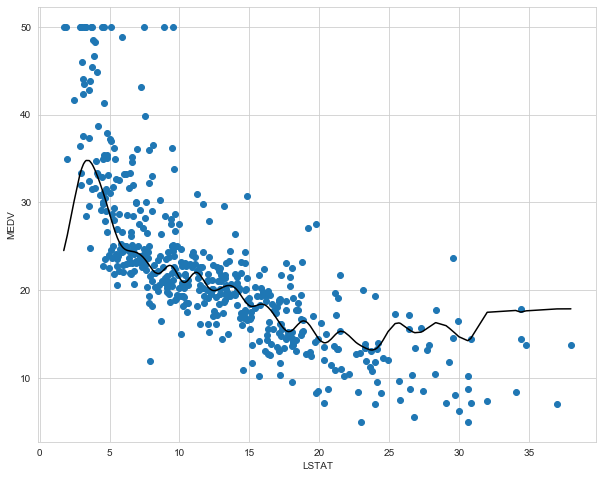

In [63]:
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], svr.predict(X[sort_idx]), color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV');

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

Linear Kernel

In [65]:
svr = svm.SVR(kernel='linear')
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [66]:
y_train_pred = svr.predict(X_train)

In [67]:
y_test_pred = svr.predict(X_test)

In [68]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 41.8187, test: 36.8372


In [69]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 0.5242, test: 0.5056


Polynomial

In [70]:
svr = svm.SVR(kernel='poly', C=1e3, degree=2)
svr.fit(X_train, y_train)

/Users/pramote/py374-venv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [71]:
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

In [72]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

MSE train: 110.3334, test: 114.3676
R^2 train: -0.2553, test: -0.5349


rbf Kernel

In [73]:
svr = svm.SVR(kernel='rbf', C=1e3, gamma=0.1)
svr.fit(X_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [74]:
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

In [75]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

MSE train: 27.5635, test: 26.7051
R^2 train: 0.6864, test: 0.6416


***
# 6. Advantages and Disadvantages



The **advantages** of support vector machines are:
* Effective in high dimensional spaces.
* Uses only a subset of training points (support vectors) in the decision function.
* Many different Kernel functions can be specified for the decision function.
    * Linear
    * Polynomial
    * RBF
    * Sigmoid
    * Custom


The **disadvantages** of support vector machines include:
* Beware of overfitting when num_features > num_samples.
* Choice of Kernal and Regularization can have a large impact on performance
* No probability estimates


***

# Summary


| Class |  Out-of-core support | Kernel Trick |
| :- |  :- | :- | :- |
| `SGDClassifier` |  Yes | No |
| `LinearSVC` |  No | No |
| `SVC` |  No | Yes |

**Note:** All require features scaling

Support Vector Machine algorithms are not scale invariant, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1. Note that the same scaling must be applied to the test vector to obtain meaningful results. See section Preprocessing data for more details on scaling and normalization. ~ [scikit-learn documentation](http://scikit-learn.org/stable/modules/svm.html#svm)

# Where to From Here

* [LIBSVM](http://www.csie.ntu.edu.tw/~cjlin/libsvm/)
* [LIBLINEAR](http://www.csie.ntu.edu.tw/~cjlin/liblinear/)
* [Hands-On Machine Learning with Scikit-Learn and TensorFlow](https://www.safaribooksonline.com/library/view/hands-on-machine-learning/9781491962282/ch05.html#svm_chapter)
* [Python Data Science Handbook](https://www.safaribooksonline.com/library/view/python-data-science/9781491912126/ch05.html#in-depth-support-vector-machines)
* [Python Machine Learning, 2E](https://www.safaribooksonline.com/library/view/python-machine-learning/9781787125933/ch03s04.html)
* [Statistics for Machine Learning](https://www.safaribooksonline.com/library/view/statistics-for-machine/9781788295758/f2c95085-6676-41c6-876e-ab6802666ea2.xhtml)
* [ConvNetJS](http://cs.stanford.edu/people/karpathy/convnetjs/)


***